In [951]:
import numpy as np
import matplotlib.pyplot as plt

In [1250]:
# Ve2_true, Vmu2_true = 1e-6, 1e-6
Ve2_true, Vmu2_true = 1e-4, 1e-4

# Ve2 = 10**(np.linspace(-6.75, -5.25, 1000))
# Vmu2 = 10**(np.linspace(-6.25, -5.75, 1000))

# pct = 0.005
pcte = 0.025
pctmu = 0.025
Ve2 = 10**(np.linspace(np.log10(Ve2_true)*(1-pcte), np.log10(Ve2_true)*(1+pcte), 1000))
Vmu2 = 10**(np.linspace(np.log10(Vmu2_true)*(1-pctmu), np.log10(Vmu2_true)*(1+pctmu), 1000))

# Ve2[0], Ve2[-1]

In [1251]:
# Ne = 1.12e7
# Nmu = 1.10e7

# Be = 2.08e2
# Bmu = 2.08e2

Ne = 1.12e7 
Nmu = 1.12e7 

Be = 2.08e3 * 6/100
Bmu = 2.08e3 * 94/100

In [1252]:
def cal_lnP(Ve2, Vmu2, Ve2_true, Vmu2_true, Ne, Be, Nmu, Bmu):
    lmbd_e = (Ve2 * Vmu2)/(Ve2 + Vmu2) * Ne + Be
    lmbd_mu = (Vmu2 * Vmu2)/(Ve2 + Vmu2) * Nmu + Bmu
    k_e = (Ve2_true * Vmu2_true)/(Ve2_true + Vmu2_true) * Ne + Be
    k_mu = (Vmu2_true * Vmu2_true)/(Ve2_true + Vmu2_true) * Nmu + Bmu
    
    lnP_e = (k_e - lmbd_e) + k_e * np.log(lmbd_e/k_e)
    lnP_mu = (k_mu - lmbd_mu) + k_mu * np.log(lmbd_mu/k_mu)
    
    return lnP_e + lnP_mu    

In [1253]:

lnP = []
for Vmu2i in Vmu2:
    lnPi = cal_lnP(Ve2, Vmu2i, Ve2_true, Vmu2_true, Ne, Be, Nmu, Bmu)
    lnP.append(lnPi)
lnP = np.array(lnP)

lnP_05 = lnP + 1/2

In [1254]:
lnP_05.shape

(1000, 1000)

In [1255]:
Ve2_1sd = []
Vmu2_1sd_u = []
Vmu2_1sd_l = []

for i, Ve2i in enumerate(Ve2):
    if (abs(lnP_05[i]).min()/0.5 > 1/100):
        continue
    Ve2_1sd.append(Ve2i)
    Vmu2_1sd_u.append(Vmu2[int(lnP_05.shape[1]/2)+np.argmin(abs(lnP_05[i, int(lnP_05.shape[1]/2):]))])
    Vmu2_1sd_l.append(Vmu2[np.argmin(abs(lnP_05[i, :int(lnP_05.shape[1]/2)]))])


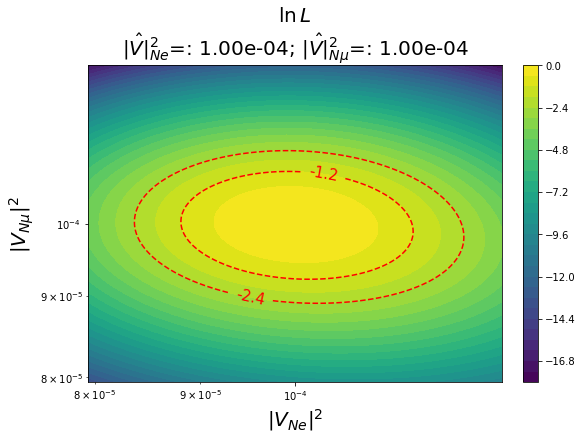

In [1256]:
# f = plt.figure(figsize=(8,6))
fig1, ax2 = plt.subplots(constrained_layout=True, figsize=(8,6))
# fig1, ax2 = plt.subplots()
# CS = ax2.contourf(Ve2[int(len(Ve2)/4):int(len(Ve2)/4*3)], 
#                   Vmu2[:int(len(Vmu2)/4*3)], 
#                   lnP[:int(len(Vmu2)/4*3), int(len(Ve2)/4):int(len(Ve2)/4*3)],
#                   10)

CS = ax2.contourf(Ve2, Vmu2, lnP, 30)

ax2.set_xscale('log')
ax2.set_yscale('log')
cbar = fig1.colorbar(CS)
CS2 = ax2.contour(CS, levels=CS.levels[-5::2], colors='r')
ax2.clabel(CS2, fmt='%2.1f', fontsize=15)

ax2.set_title(r'$\ln L$' + '\n'+r'$\hat{|V|}_{Ne}^{2}$=' + f': {Ve2_true:.2e}'  + r'; $\hat{|V|}_{N\mu}^{2}$=' + f': {Vmu2_true:.2e}', fontsize=20);
ax2.set_xlabel(r'$|V_{Ne}|^2$', fontsize=20);
ax2.set_ylabel(r'$|V_{N\mu}|^2$', fontsize=20);